# Homework Assignment 3
by `Nurseiit Abdimomyn`

id `20172001`

at `nurs@unist.ac.kr`

In [1]:
from operator import itemgetter
import csv # I don't like Pandas, so here we go :)
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('quakers_nodelist.csv', 'r') as f:                     
    nodereader = csv.reader(f)
    nodes = [node for node in nodereader][1:] # ignore header

node_names = [node[0] for node in nodes]

with open('quakers_edgelist.csv', 'r') as f:
    edgereader = csv.reader(f)
    edges = [tuple(edge) for edge in edgereader][1:] # ignore header

In [3]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [4]:
gender = {}
birthdate = {}

for node in nodes:
    gender[node[0]] = node[2]
    birthdate[node[0]] = int(node[3])

nx.set_node_attributes(G, gender, 'gender')
nx.set_node_attributes(G, birthdate, 'birthdate')

## Problem 1a

    Draw the Quakers Network with different node color depending node's gender.

In [5]:
gender_spectrum = ['red' if gender[node] == 'male' else 'blue' for node in G.nodes()]

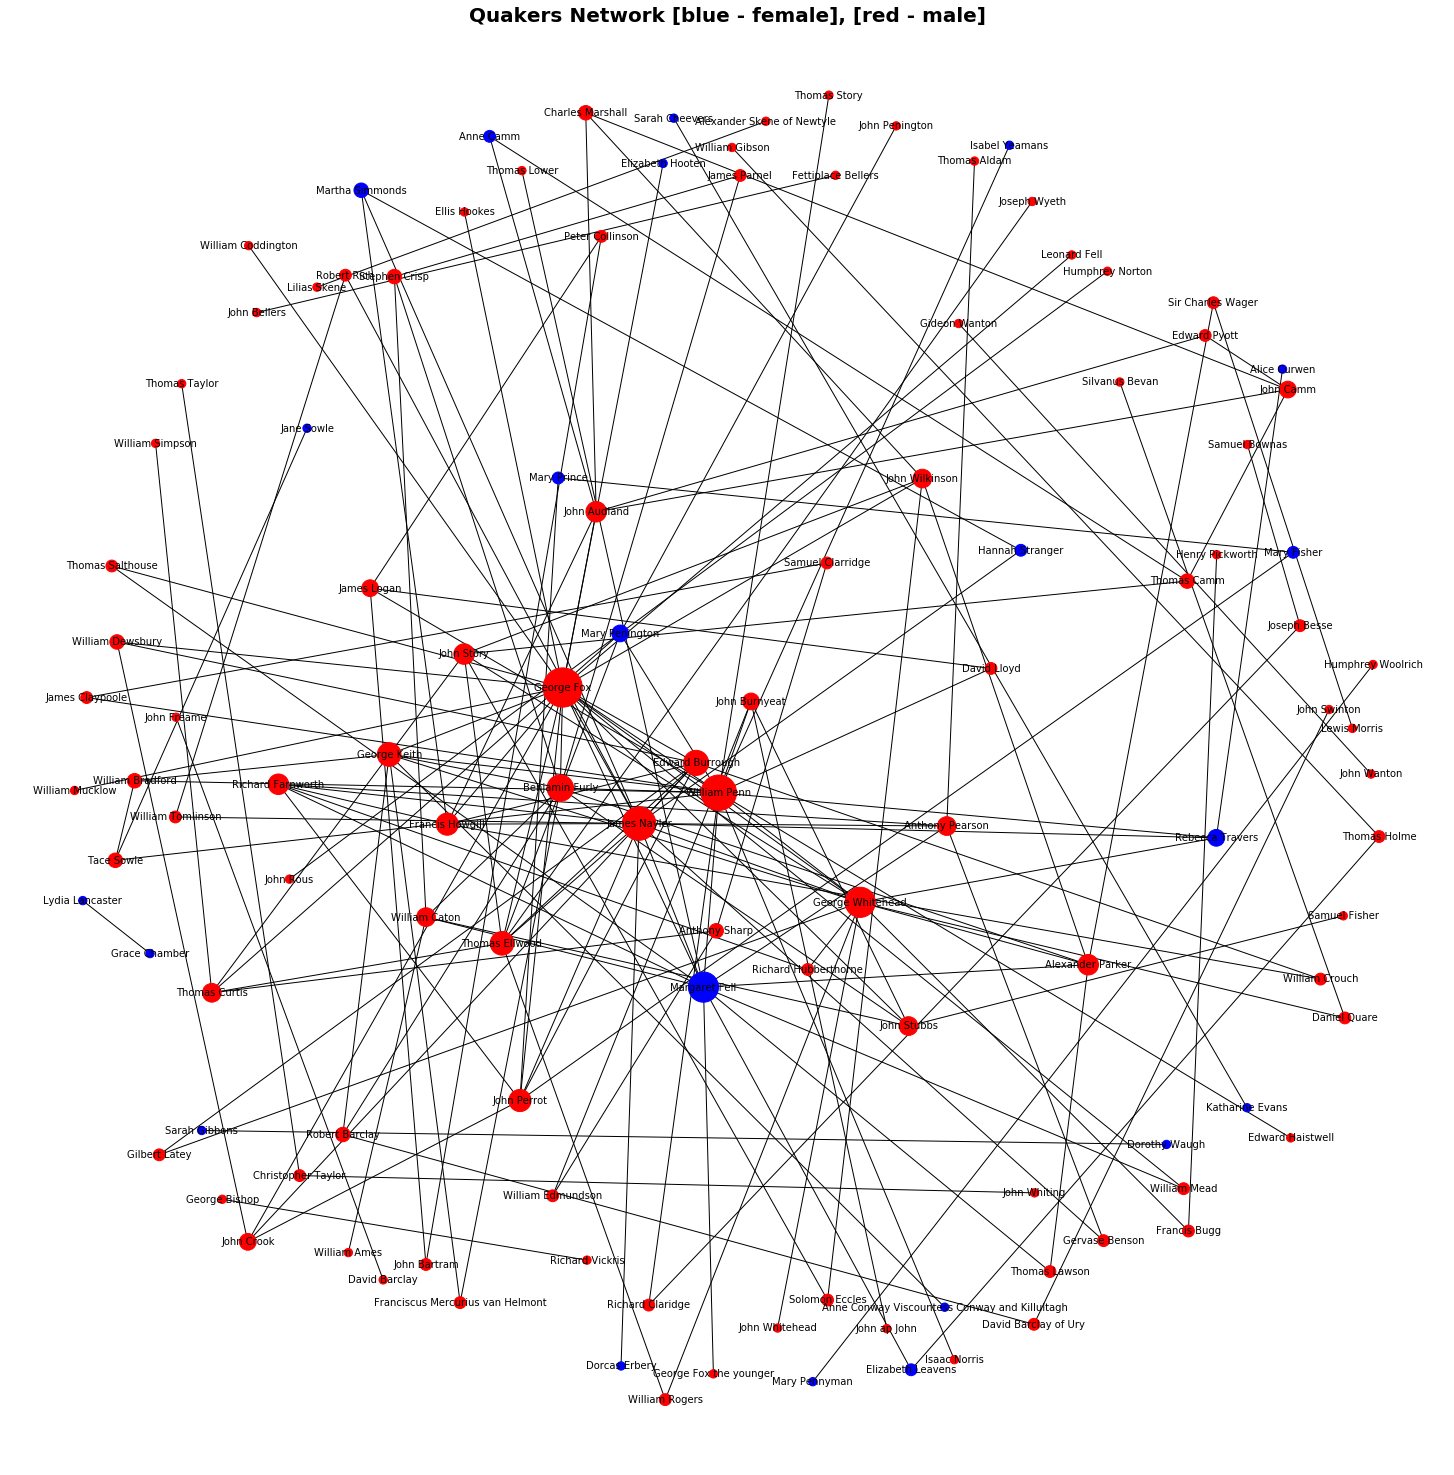

In [6]:
dig = dict(nx.degree(G))
pos = nx.spring_layout(G, k = 1)
plt.figure(figsize = (20, 20))
nx.draw(G, pos, with_labels = True,
        node_size = [d*70 for d in dig.values()],
        node_color = gender_spectrum,
        font_size = 10
       )
plt.title('Quakers Network [blue - female], [red - male]',
          fontsize=20,
          fontweight='bold'
         )
plt.show()

## Problem 1b

    Draw the Quakers Network with different node size with repect to the node's birth date (use the at least three different color. For example, red if birthdate in 15th, blue if the birthdats in 16th and green otherwise) 

In [7]:
get_color = lambda x: 'red' if x == 15 else ('blue' if x == 16 else 'green')

birthdate_spectrum = [get_color(birthdate[node] // 100) for node in G.nodes()]

sorted_birthdate = sorted(birthdate.items(), key=itemgetter(1), reverse=True)

size_by_birthdate = [50 * sorted_birthdate.index((node, birthdate[node])) for node in G.nodes()]

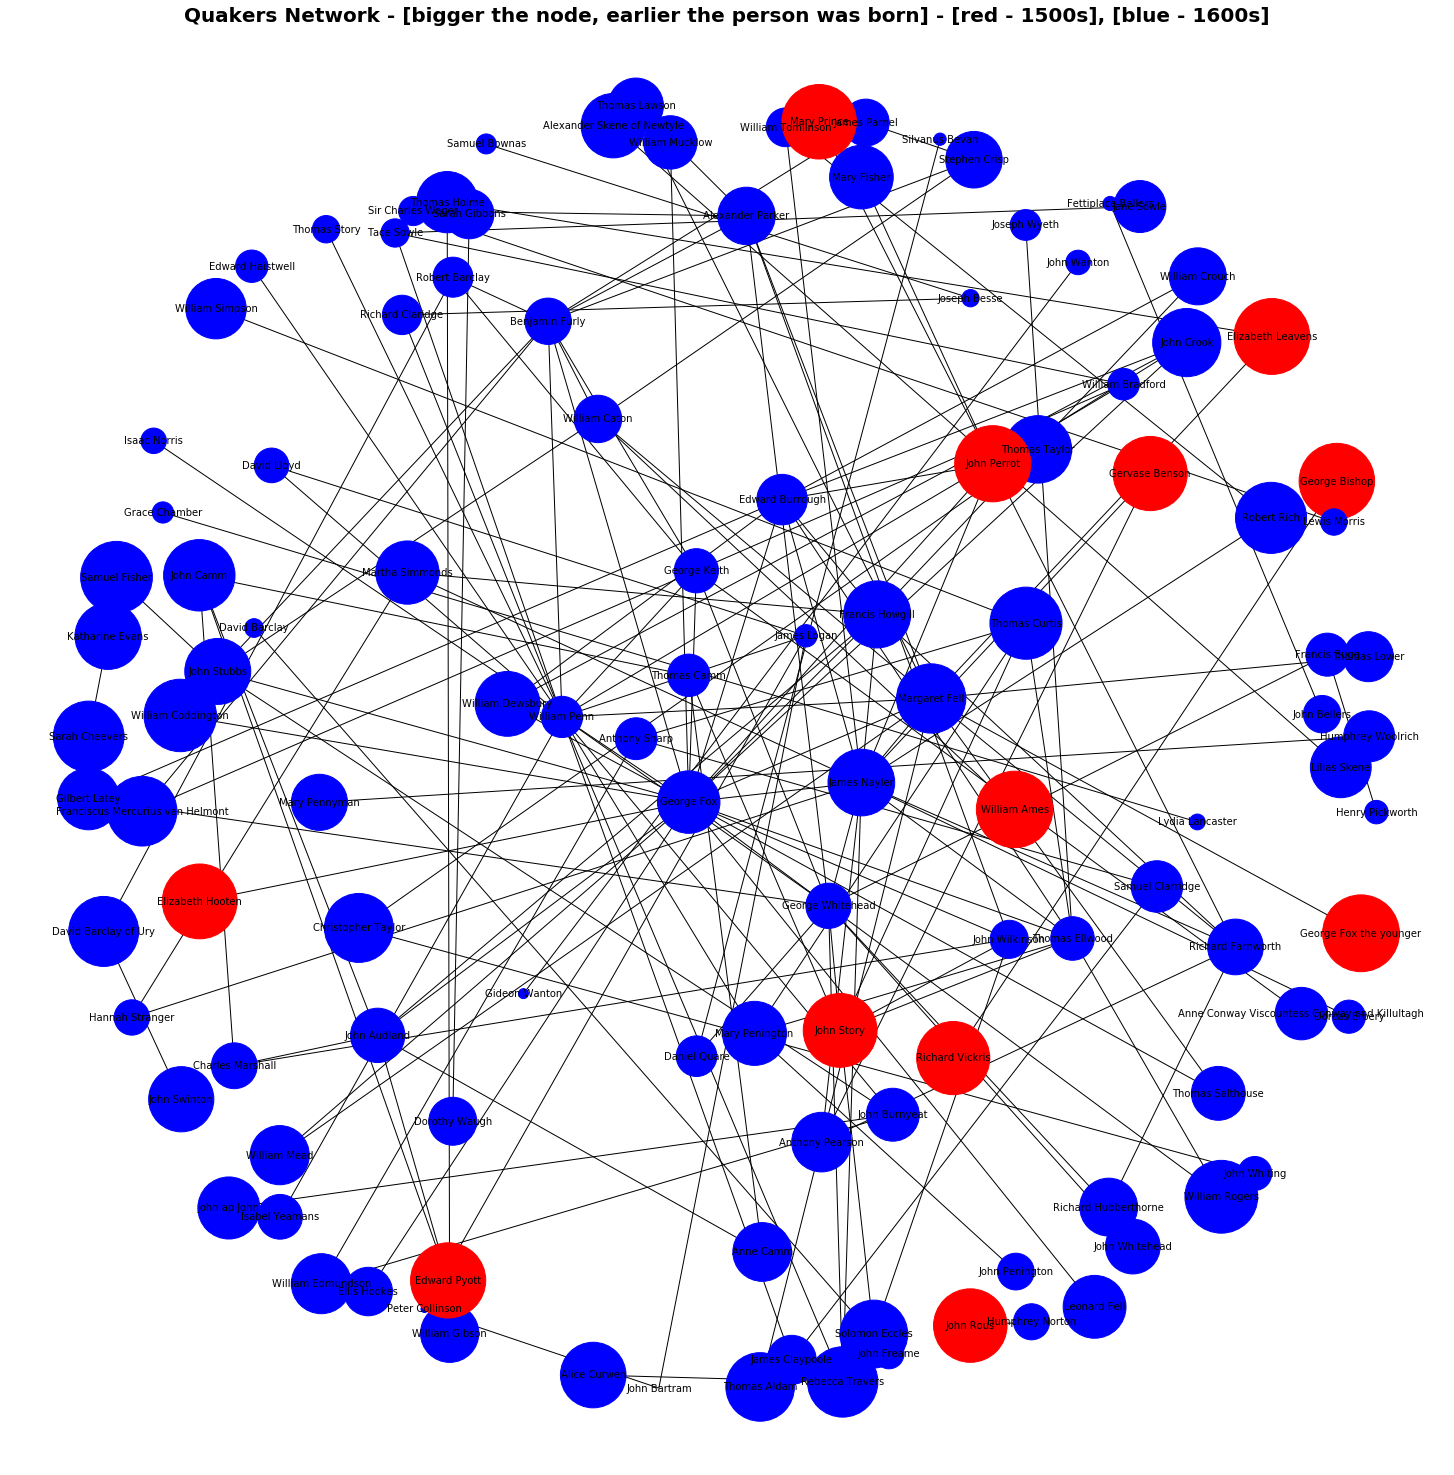

In [8]:
pos = nx.spring_layout(G, k = 1)
plt.figure(figsize = (20, 20))
nx.draw(G, pos, with_labels = True,
        node_size = size_by_birthdate,
        node_color = birthdate_spectrum,
        font_size = 10
       )
plt.title('Quakers Network - [bigger the node, earlier the person was born] - [red - 1500s], [blue - 1600s]',
          fontsize=20,
          fontweight='bold'
         )
plt.show()

## Problem 2, Episode 1

    Construct the Actor-Actor network and show the plot. That is, node: Actor, Edge: Actors appear in the same scene

In [9]:
with open('StarWars_ep1.csv', 'r') as f:           
    ep1reader = csv.reader(f)
    ep1 = [event for event in ep1reader][1:] # ignore header

In [10]:
scenes = {}
actors = {}

for event in ep1:
    sequence = int(event[2])
    scenes[sequence] = int(event[1])
    actors[sequence] = event[5]

In [11]:
all_actors = list(set([actor[1] for actor in actors.items()]))
all_scenes = list(set([scene[1] for scene in scenes.items()]))

scenes_with_actors = {}

for sequence, scene in scenes.items():
    actor = actors[sequence]
    if scene not in scenes_with_actors:
        scenes_with_actors[scene] = set()
    scenes_with_actors[scene].add(actor)

actor_edges = []
for i in scenes_with_actors:
    for _to in scenes_with_actors[i]:
        for _from in scenes_with_actors[i]:
            if _to != _from:
                actor_edges.append((_from, _to))
                
actor_edges = list(set(actor_edges))

In [12]:
Q = nx.Graph()
Q.add_nodes_from(all_actors)
Q.add_edges_from(actor_edges)
print(nx.info(Q))

Name: 
Type: Graph
Number of nodes: 72
Number of edges: 261
Average degree:   7.2500


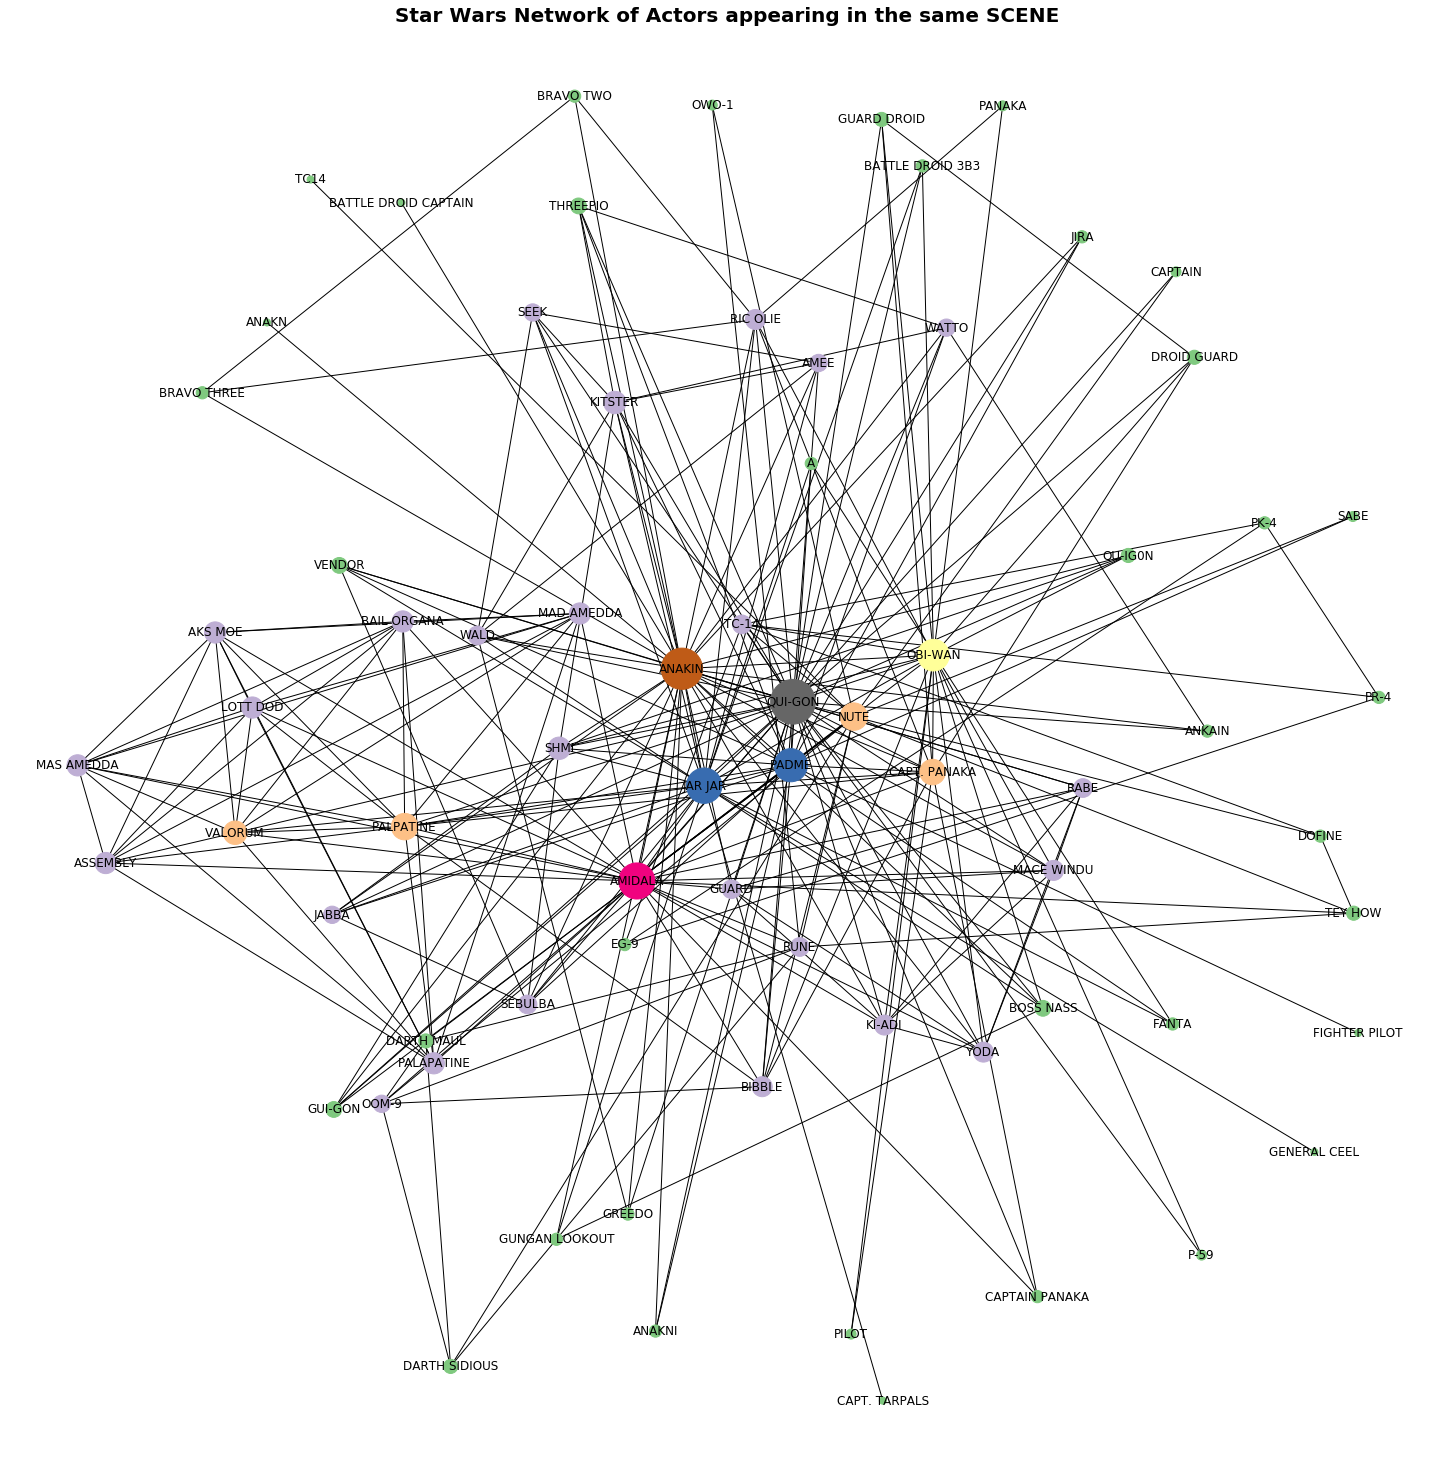

In [13]:
pos = nx.spring_layout(Q, k = 1)
dig = dict(nx.degree(Q))
plt.figure(figsize = (20, 20))
nx.draw(Q, pos, with_labels = True,
        node_size = [d * 50 for d in dig.values()],
        node_color = list(dig.values()),
        font_size = 12,
        cmap=plt.cm.Accent
       )
plt.title('Star Wars Network of Actors appearing in the same SCENE',
          fontsize=20,
          fontweight='bold'
         )
plt.show()

## Problem 2, Episode 2
    Construct the Actor-Place network and show the plot. That is, node: Actor, Edge: Actors appear in the same place

In [14]:
with open('StarWars_ep2.csv', 'r') as f:           
    ep2reader = csv.reader(f)
    ep2 = [event for event in ep2reader][1:] # ignore header

In [15]:
places = {}
actors = {}

for event in ep2:
    sequence = int(event[2])
    places[sequence] = event[3]
    actors[sequence] = event[5]

In [16]:
all_actors = list(set([actor[1] for actor in actors.items()]))
all_places = list(set([place[1] for place in places.items()]))

places_with_actors = {}

for sequence, place in places.items():
    actor = actors[sequence]
    if place not in places_with_actors:
        places_with_actors[place] = set()
    places_with_actors[place].add(actor)

actor_edges = []
for i in places_with_actors:
    for _to in places_with_actors[i]:
        for _from in places_with_actors[i]:
            if _to != _from:
                actor_edges.append((_from, _to))
                
actor_edges = list(set(actor_edges))

In [17]:
W = nx.Graph()
W.add_nodes_from(all_actors)
W.add_edges_from(actor_edges)
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 482
Average degree:  13.7714


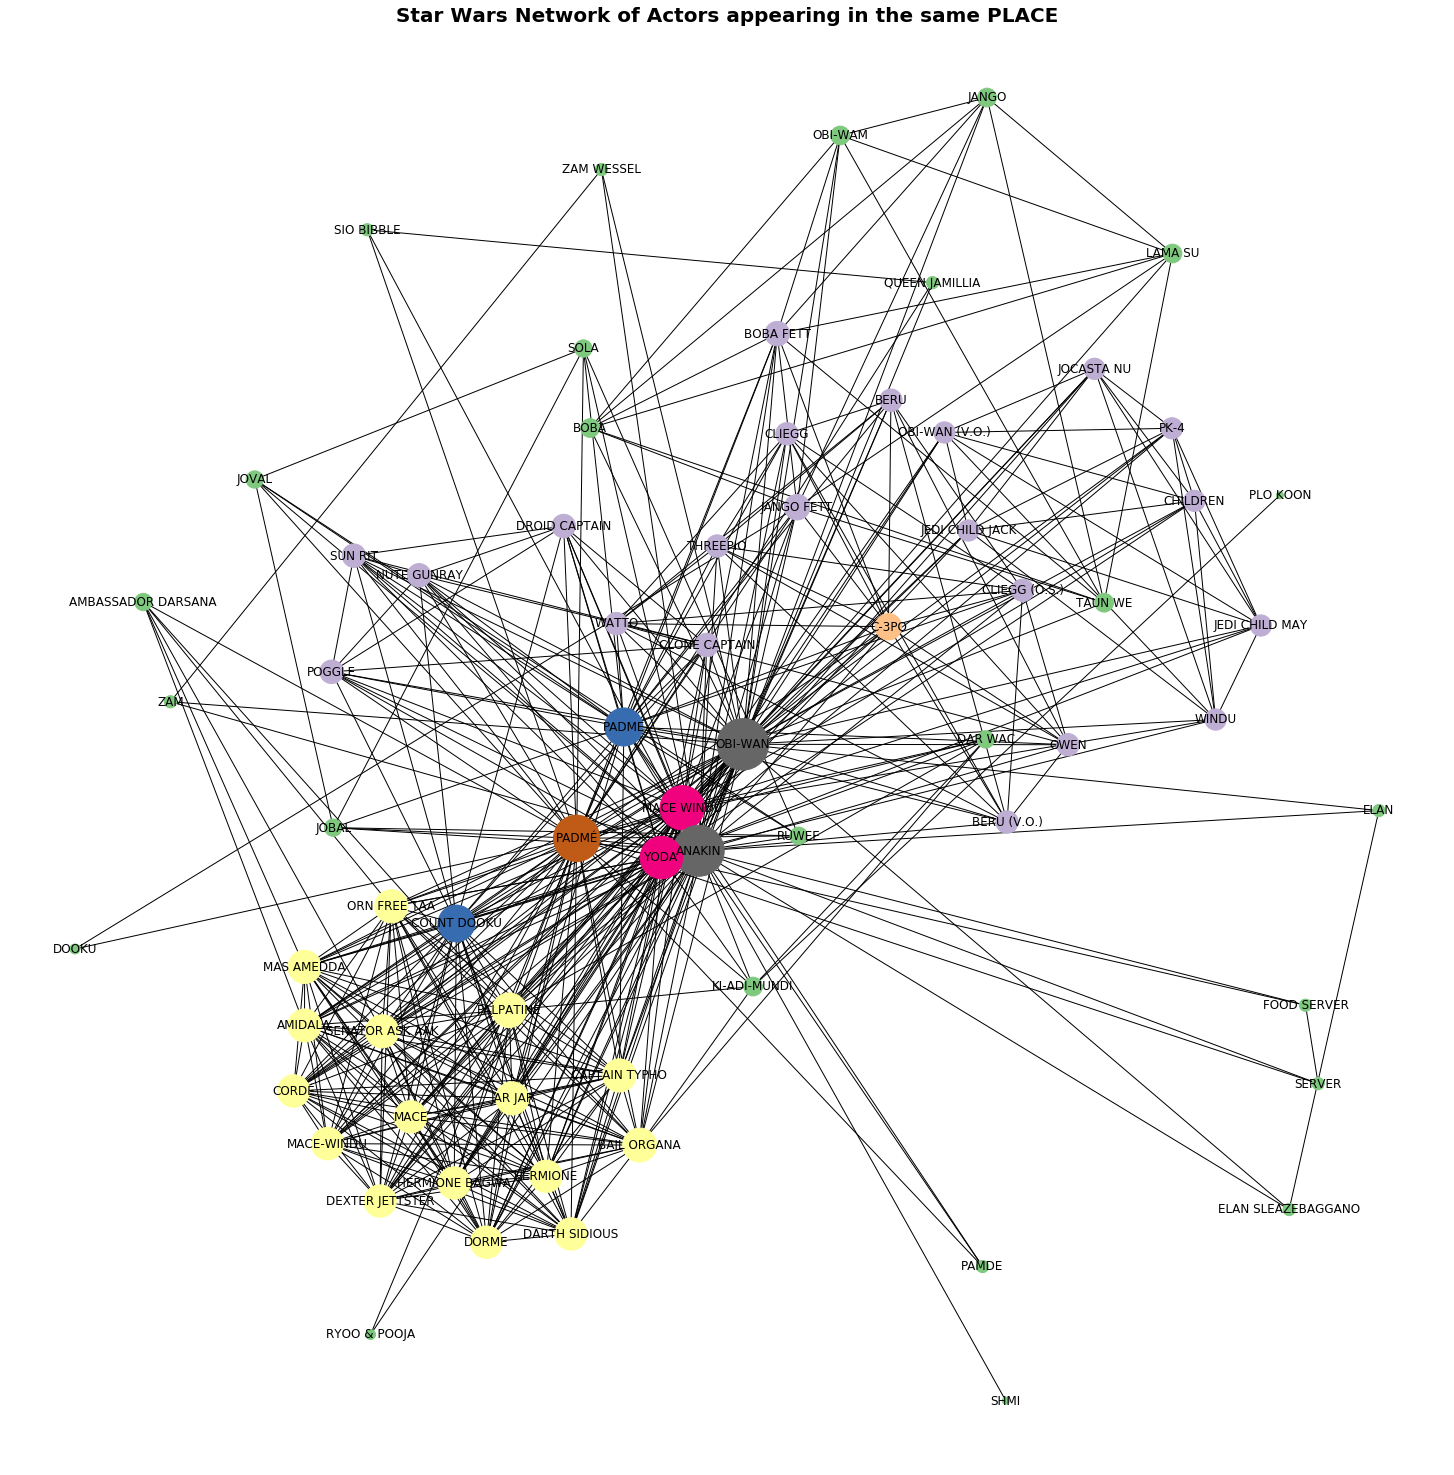

In [18]:
pos = nx.spring_layout(W, k = 1)
dig = dict(nx.degree(W))
plt.figure(figsize = (20, 20))
nx.draw(W, pos, with_labels = True,
        node_size = [d * 50 for d in dig.values()],
        node_color = list(dig.values()),
        font_size = 12,
        cmap=plt.cm.Accent
       )
plt.title('Star Wars Network of Actors appearing in the same PLACE',
          fontsize=20,
          fontweight='bold'
         )
plt.show()